In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import numpy as np
from scipy.signal import wiener, savgol_filter

import random
random.seed(0)
np.random.seed(0)

In [2]:
model = PySRRegressor(
    model_selection="score",  # Result is mix of simplicity+accuracy
    niterations=40,
    populations=50,
    binary_operators=["+", "-", "*"],
    unary_operators=[
        "sin",
    ],
    parsimony=1e5, 
    random_state=1, 
    procs=0, 
    multithreading=False, 
    deterministic=True, 
    denoise=True
)

In [3]:
X = np.load("./tmp_data/t.npy").reshape(-1, 1)
y = np.load("./tmp_data/xi.npy"); y = y[0]

In [4]:
wl = len(y)//2; print(wl)
y = savgol_filter(y, wl, 2)

118


In [5]:
model.fit(X, savgol_filter(y, wl, 2)) # 126, 118 for 90% noise ok

/Users/pongpisit/anaconda3/envs/pysr/lib/python3.10/site-packages/pysr/sr.py:1233: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/Users/pongpisit/anaconda3/envs/pysr/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
  Activating project at `~/anaconda3/envs/pysr/share/pysr/depot/environments/pysr-0.11.6`


Started!

Cycles per second: 1.120e+05
Head worker occupation: 85.3%
Progress: 308 / 2000 total iterations (15.400%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.007e-02  -1.000e-10  -0.9389319
5           1.396e-02  9.072e-02  ((x0 * 0.029254409) + -1.0852036)
6           1.223e-02  1.327e-01  ((sin(x0) * -0.11715875) - 0.9216866)
8           1.036e-02  8.296e-02  ((sin(x0 + -0.6189823) * -0.11715875) - 0.9216866)
9           9.967e-03  3.856e-02  ((sin(sin(-0.21534157 * x0)) - -2.751948) * -0.4206604)
10          8.840e-03  1.200e-01  ((sin(sin(sin(-0.21534157 * x0))) - -2.751948) * -0.4206604)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.260e+05
Head worker occupation: 75.9%
Progress: 693 / 2000 total iterations (34.650%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.007e-02  -1.000e-10  -0.9389319
5           1.396e-02  9

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         -0.9389319   
	1        0.090720                  ((x0 * 0.029254409) + -1.0852036)   
	2        0.132698              ((sin(x0) * -0.11715875) - 0.9216866)   
	3        0.142564             sin(-1.8474658 + sin(x0 * 0.31164053))   
	4  >>>>  0.619622  ((sin(x0 * 0.78827477) * -0.11715875) - 0.9216...   
	5        0.003465  ((sin(sin(0.9216866) * x0) * -0.11715875) - 0....   
	6        0.014671  ((sin((0.53770626 + x0) * 0.78827477) * -0.117...   
	7        0.430080  (((sin(sin(0.9216866) * x0) * 1.4327853) * -0....   
	
	       loss  complexity  
	0  0.020072           1  
	1  0.013964           5  
	2  0.012228           6  
	3  0.010604           7  
	4  0.005706           8  
	5  0.005687           9  
	6  0.005604          10  
	7  0.003645          11  
]

In [6]:
model.get_best().sympy_format

-0.11715875*sin(0.78827477*x0) - 0.9216866

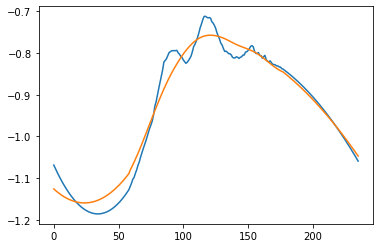

In [7]:
plt.plot(y)
plt.plot(savgol_filter(y, wl, 2))
plt.show()

In [8]:
ground = (-1*(1+0.25*np.sin(X))).ravel()

In [9]:
space = [3+i for i in range(0, 200)]
space[np.argmin([((savgol_filter(y, n, 2)-ground)**2).mean() for n in space])]

84

In [10]:
[space[e] for e in np.argsort([((savgol_filter(y, n, 2)-ground)**2).mean() for n in space])]

[84,
 86,
 82,
 58,
 56,
 60,
 54,
 62,
 52,
 64,
 50,
 66,
 74,
 78,
 80,
 68,
 48,
 76,
 70,
 72,
 88,
 46,
 44,
 42,
 40,
 38,
 90,
 36,
 34,
 32,
 30,
 85,
 28,
 83,
 92,
 26,
 87,
 24,
 22,
 81,
 79,
 20,
 18,
 77,
 16,
 75,
 14,
 73,
 89,
 12,
 10,
 8,
 6,
 4,
 69,
 71,
 65,
 63,
 67,
 61,
 59,
 57,
 94,
 55,
 53,
 120,
 51,
 49,
 91,
 118,
 47,
 45,
 122,
 96,
 43,
 41,
 116,
 93,
 39,
 37,
 119,
 35,
 121,
 98,
 33,
 95,
 114,
 117,
 31,
 124,
 29,
 100,
 27,
 25,
 123,
 97,
 23,
 115,
 112,
 21,
 19,
 102,
 17,
 15,
 13,
 11,
 9,
 7,
 5,
 3,
 99,
 110,
 104,
 113,
 106,
 108,
 101,
 111,
 126,
 125,
 103,
 109,
 105,
 107,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
